<a href="https://colab.research.google.com/github/mickeykim70/keras_study/blob/main/3_4_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import keras

os.environ["KERAS_BACKEND"] = "tensorflow"

keras.__version__

'3.5.0'

In [2]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=10000
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(train_data.shape)

(25000,)


# 1. 데이터 준비

In [4]:
import numpy as np

# 0 matrix - [sequences, dimension]
def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # 데이터가 있는 특정 인덱스의 위치를 1로 만듦 --> one-hot encoding

    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# label을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 2. 신경망 모델 만들기

In [7]:
# keras ver 3

# 권장되는 새로운 방식
model = keras.Sequential([
    keras.layers.Input(shape=(10000,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])


### model compile

In [8]:
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

## 훈련 검증

In [9]:
# 10000개의 샘플을 만들어서 검증세트로 활용
# x_val = x_train[:10000]
# partial_x_train = x_train[10000:]
# y_val = y_train[:10000]
# partial_y_train = y_train[10000:]

from sklearn.model_selection import train_test_split

# 검증 세트 분할
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=10000,
)

In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - binary_accuracy: 0.9995 - loss: 0.0076 - val_binary_accuracy: 0.8672 - val_loss: 0.6716
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - binary_accuracy: 0.9990 - loss: 0.0068 - val_binary_accuracy: 0.8684 - val_loss: 0.6920
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.9999 - loss: 0.0036 - val_binary_accuracy: 0.8650 - val_loss: 0.7207
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - binary_accuracy: 0.9993 - loss: 0.0051 - val_binary_accuracy: 0.8681 - val_loss: 0.7405
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 1.0000 - loss: 0.0026 - val_binary_accuracy: 0.8682 - val_loss: 0.7582
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - binary_accuracy: 0.9987 - loss: 0.0056 - val_binary_accuracy: 0.8677 - val_loss: 0.7729
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - binary_accuracy: 1.0000 - loss: 0.0020 - val_binary_accuracy: 0.8679 - val_loss: 0.7923
Epoch 8/30
30

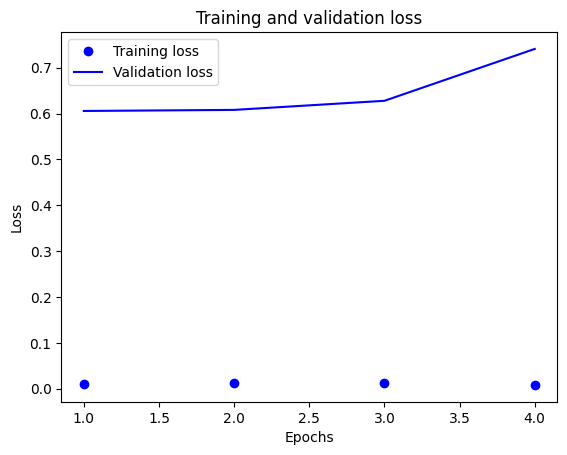

In [18]:
# graph (훈련 : 검증 손실)
import matplotlib.pyplot as plt

history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

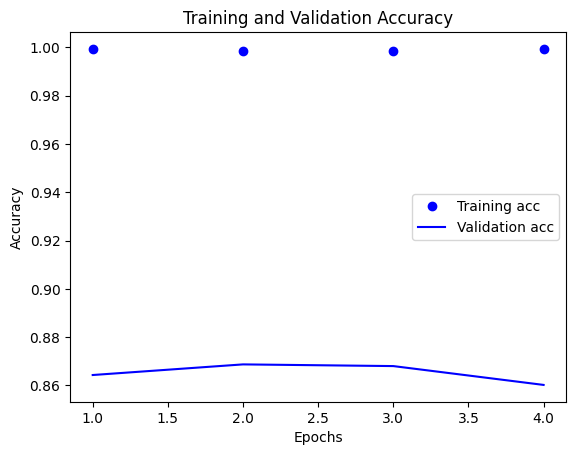

In [19]:
# graph (훈련 : 검증 정확도)
plt.clf() # 그래프 초기화

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
print(history.history.keys())

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


In [21]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.8518 - loss: 0.7839
[0.7557410001754761, 0.8539999723434448]


In [22]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.05812755],
       [1.        ],
       [0.056873  ],
       ...,
       [0.00526407],
       [0.00297594],
       [0.00107781]], dtype=float32)